In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties like correlation of the dataset.

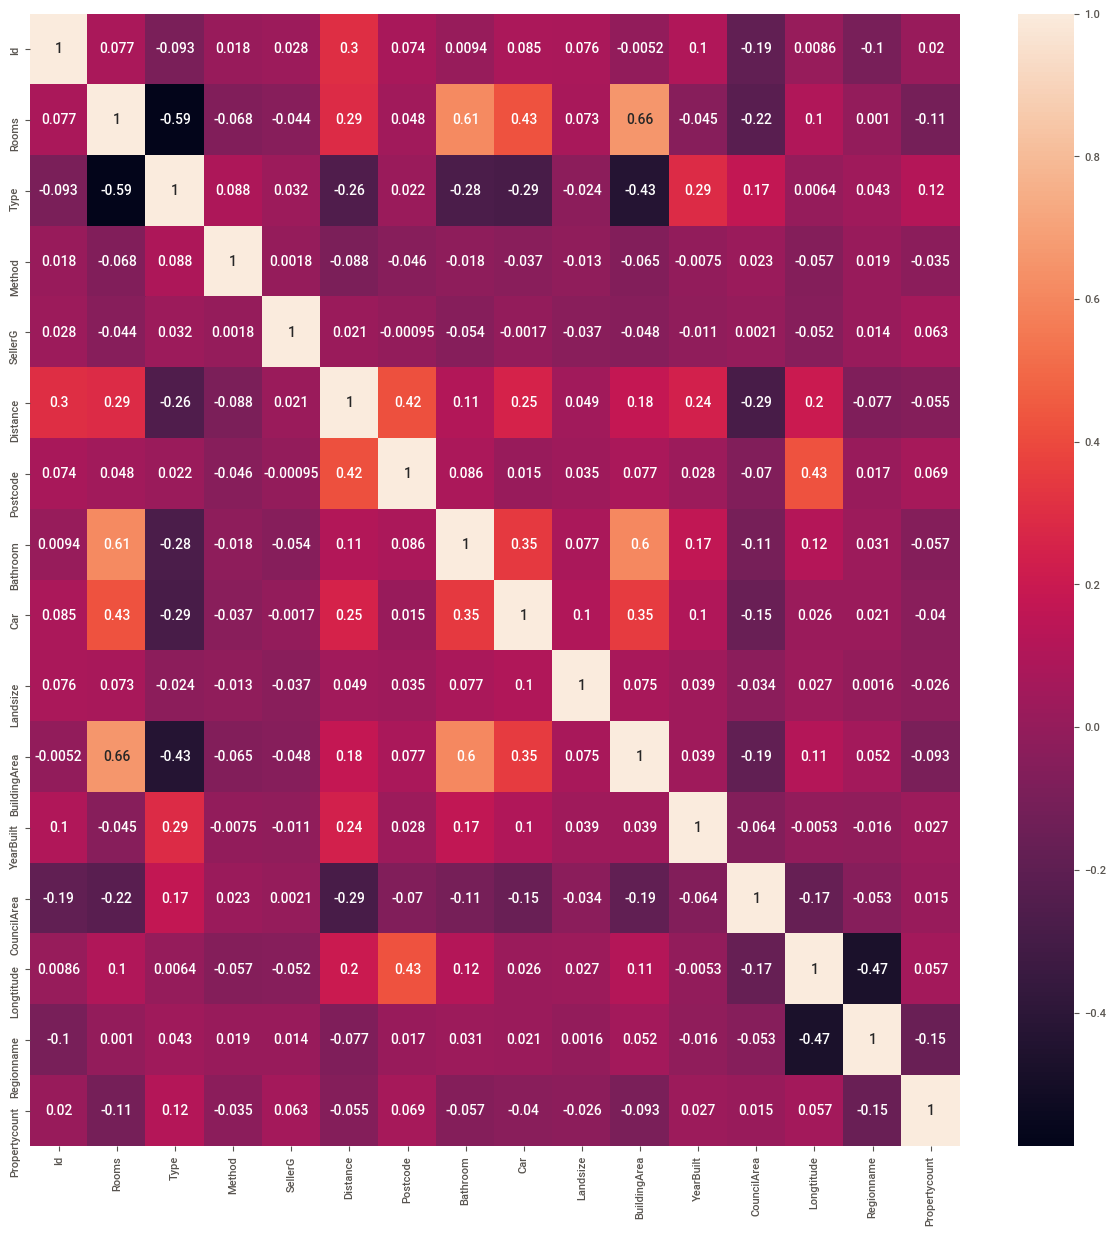

In [15]:
# Code starts here
df = pd.read_csv("D:\\Study_material\\GreyAtom\\projects\\movetomelboure\\train.csv")
df.head()
y = df['Price']
X = df.drop('Price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=6)

corr = X_train.corr()

#print(corr)
fig = plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot = True)
plt.show()

# Code ends here.

In [14]:
df.isnull().sum()

Id               0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [8]:
import sweetviz
my_report  = sweetviz.analyze([df,'Train'], target_feat='Price')
my_report.show_html('FinalReport.html')

                                             |                                             | [  0%]   00:00 ->…

Report FinalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different regularization techniques.

In [6]:
# Code starts here

# --------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Code starts here

regressor = LinearRegression()

regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test,y_pred)

print(" #### r2 #### ", r2)

# --------------
from sklearn.linear_model import Lasso

# Code starts here

lasso = Lasso()

lasso.fit(X_train,y_train)

lasso_pred = lasso.predict(X_test)

r2_lasso = r2_score(y_test,lasso_pred)

print(" #### r2 lasso  #### ", r2_lasso)

# --------------
from sklearn.linear_model import Ridge

# Code starts here
ridge = Ridge()

ridge.fit(X_train,y_train)

ridge_pred = ridge.predict(X_test)

r2_ridge = r2_score(y_test,ridge_pred)

print(" #### r2 lasso  #### ", r2_ridge)
# Code ends here


# --------------
from sklearn.model_selection import cross_val_score

#Code starts here

regressor = LinearRegression()

score = cross_val_score(regressor,X_train,y_train,cv=10)

mean_score = np.mean(score)

print("mean score", mean_score)


# --------------
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Code starts here

model = make_pipeline(PolynomialFeatures(2),LinearRegression())

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

r2_poly = r2_score(y_test,y_pred)

print(" #### r2 poly  #### ", r2_poly)

# Code ends here.

 #### r2 ####  0.5270656389349455
 #### r2 lasso  ####  0.5270624833347839
 #### r2 lasso  ####  0.5262203747327248
mean score 0.6371679622911407
 #### r2 poly  ####  0.13090805596753374


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [16]:
# Code starts here

df_test = pd.read_csv("D:\\Study_material\\GreyAtom\\projects\\movetomelboure\\test.csv")
id = df_test['Id']
preds = pd.DataFrame(lasso.predict(df_test))
preds_m = pd.DataFrame(model.predict(df_test))
preds.to_csv("preds.csv")
preds_m.to_csv("preds_m.csv")











# Code ends here.